### Домашнее задание к уроку 2<a class="anchor" id="hw"></a><center>

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

__Задача:__ предсказание баллов ЕГЭ ученика

In [146]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [147]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [148]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [149]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

-4.163336342344337e-17
0.9999999999999999


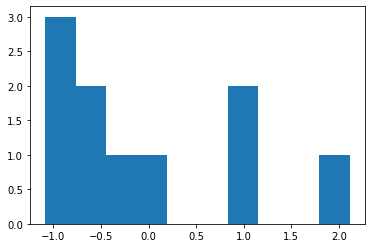

In [150]:
print(np.mean(X_st[:, 2]))
print(np.std(X_st[:, 2]))

plt.hist(X_st[:, 2])
plt.show()

In [151]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

1. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [152]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
# ******
        dReg = reg * np.sign(W) # градиент регуляризации
#         dReg = reg * W # градиент регуляризации
# ******
        
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [153]:
gradient_descent_reg_l1(X_st, y, 20000)

Iter: 0, weights: [ 0.11488472 -1.60877263  0.81412866  0.01100207], error 3359.603100860781
Iter: 2000, weights: [18.70543894  1.43152602  3.41589962  2.7988275 ], error 1478.5689671336318
Iter: 4000, weights: [31.16656158  2.69440399  4.16697677  3.7745654 ], error 674.7359187824811
Iter: 6000, weights: [39.51916773  3.31016867  4.27493369  4.11822194], error 318.4506673317943
Iter: 8000, weights: [45.11786309  3.6800819   4.16538038  4.24535481], error 158.74554445088378
Iter: 10000, weights: [48.87063068  3.94771703  3.98786315  4.30170307], error 86.83671234192408
Iter: 12000, weights: [51.38608539  4.16544041  3.79451034  4.33784526], error 54.33762886631824
Iter: 14000, weights: [53.07217766  4.35322584  3.60311206  4.37086426], error 39.56448582317737
Iter: 16000, weights: [54.20235389  4.51944485  3.41938952  4.40611095], error 32.777776961033204
Iter: 18000, weights: [54.95990336  4.66822671  3.24485337  4.44487876], error 29.5986611292523
Final MSE: 28.056708689267225


array([55.46747714,  4.80201018,  3.07965385,  4.48708191])

2. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

**Нормализация** заключается в приведении признаков к масштабу в диапазоне [0-1].

**Стандартизация** заключается в получении своего рода значения сдвига каждого признака от среднего. Для ее реализации необходимо вычислить среднее значение признака

In [154]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [155]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [156]:
X1 = X.copy().astype('float')
X1

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [157]:
X1[:, 1:]

array([[1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 7.00e+02, 1.00e+00],
       [2.00e+00, 7.50e+02, 2.00e+00],
       [5.00e+00, 6.00e+02, 1.00e+00],
       [3.00e+00, 1.45e+03, 2.00e+00],
       [0.00e+00, 8.00e+02, 1.00e+00],
       [5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 4.50e+02, 1.00e+00],
       [2.00e+00, 1.00e+03, 2.00e+00]])

In [158]:
X_norm = min_max_scale(X1[:, 1:])
X_norm

array([[5.00e-04, 2.50e-01, 5.00e-04],
       [5.00e-04, 3.50e-01, 5.00e-04],
       [1.00e-03, 3.75e-01, 1.00e-03],
       [2.50e-03, 3.00e-01, 5.00e-04],
       [1.50e-03, 7.25e-01, 1.00e-03],
       [0.00e+00, 4.00e-01, 5.00e-04],
       [2.50e-03, 7.50e-01, 1.50e-03],
       [5.00e-03, 1.00e+00, 1.50e-03],
       [5.00e-04, 2.25e-01, 5.00e-04],
       [1.00e-03, 5.00e-01, 1.00e-03]])

In [159]:
X_norm_std = standard_scale(X_norm)
X_norm_std

array([[-0.60601512,  0.32283164, -0.60601512],
       [-0.60601512,  0.69511491, -0.60601512],
       [-0.6041537 ,  0.78818573, -0.6041537 ],
       [-0.59856945,  0.50897328, -0.60601512],
       [-0.60229229,  2.09117718, -0.6041537 ],
       [-0.60787654,  0.88125655, -0.60601512],
       [-0.59856945,  2.184248  , -0.60229229],
       [-0.58926237,  3.11495618, -0.60229229],
       [-0.60601512,  0.22976083, -0.60601512],
       [-0.6041537 ,  1.25353982, -0.6041537 ]])

In [160]:
X_std = standard_scale(X1[:, 1:])
X_std

array([[-0.60601512,  0.32283164, -0.60601512],
       [-0.60601512,  0.69511491, -0.60601512],
       [-0.6041537 ,  0.78818573, -0.6041537 ],
       [-0.59856945,  0.50897328, -0.60601512],
       [-0.60229229,  2.09117718, -0.6041537 ],
       [-0.60787654,  0.88125655, -0.60601512],
       [-0.59856945,  2.184248  , -0.60229229],
       [-0.58926237,  3.11495618, -0.60229229],
       [-0.60601512,  0.22976083, -0.60601512],
       [-0.6041537 ,  1.25353982, -0.6041537 ]])

In [161]:
X_std_norm = min_max_scale(X_norm)
X_std_norm

array([[5.00e-04, 2.50e-01, 5.00e-04],
       [5.00e-04, 3.50e-01, 5.00e-04],
       [1.00e-03, 3.75e-01, 1.00e-03],
       [2.50e-03, 3.00e-01, 5.00e-04],
       [1.50e-03, 7.25e-01, 1.00e-03],
       [0.00e+00, 4.00e-01, 5.00e-04],
       [2.50e-03, 7.50e-01, 1.50e-03],
       [5.00e-03, 1.00e+00, 1.50e-03],
       [5.00e-04, 2.25e-01, 5.00e-04],
       [1.00e-03, 5.00e-01, 1.00e-03]])

In [162]:
X_std_norm==X_norm

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Применение и нормализации и стандартизации смысла не имеет, тк результат получится стандартизированным или нормализированным в зависимости от того, какое последнее действие применялось

3. *Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [163]:
# сгенерируем набор данных
X, y, coef = datasets.make_regression(n_samples=100000, n_features=15, n_informative=8, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10
display(X, y, coef)

array([[-10.89293056,   0.55609754,  -0.71060025, ...,   0.43956062,
          1.62789802,   0.6188562 ],
       [ -5.42495716,  -0.29380636,   0.84299441, ...,   0.14275829,
         -0.40653759,   0.86998509],
       [ -6.38082085,  -0.60122542,  -0.21593474, ...,  -0.01379034,
         -0.39239515,  -0.29701154],
       ...,
       [-12.43758106,   0.15030009,  -2.10321051, ...,   0.89440859,
          0.61249475,   1.4774436 ],
       [  4.97267325,  -0.20015054,   1.56148143, ...,   0.17191426,
         -0.29752836,   0.51136462],
       [-13.72741722,  -0.23283667,   0.43545215, ...,  -0.2727552 ,
         -2.40388697,   0.34618305]])

array([-130.5448    ,  153.49624534,  -90.06373758, ...,  137.87734551,
        142.93907532, -232.22750103])

array([24.93745444,  0.        ,  0.        , 61.39971423, 33.25296241,
       25.86645327,  0.        ,  0.        ,  0.        , 85.9657208 ,
        0.        , 97.94215744,  0.        ,  8.41186494, 42.99043361])

In [164]:
X = standard_scale(X)

In [165]:
init_W = np.random.randn(X.shape[1])
init_W

array([-0.28585801,  0.67826867,  0.95664915,  0.40426528, -0.93576527,
       -1.51028204,  0.1634278 , -0.52587832, -0.23517901,  0.72110528,
        0.87759392, -0.37338573, -0.46447664,  0.05630141, -1.57365494])

In [175]:
# стохастический градиентный спуск
def stohastic_gradient_descent(W, X, y, iterations, size, eta=1e-3):
#     W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors=[]
    w_list = [W.copy()]
    for i in range(0, iterations):
        inds = np.random.randint(n, size=size)

        X_tmp = X[inds, ]
        y_tmp = np.array(y)[inds]


        y_pred_tmp = np.dot(X_tmp, W)
        dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
        W -= (eta * dQ)

        err = calc_mse(y, np.dot(X, W))
        errors.append(err)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [186]:
# классический  GD
def gradient_descent(W, X, y, iterations, eta=1e-3):
#     W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors=[]
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        errors.append(err)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [183]:
%%time
W, errors, w_list = gradient_descent(init_W, X, y, 5000, eta=1e-4)

Iter: 0, weights: [ 6.95446692  0.69309493  1.12878864  9.10784732  3.56888213  2.22260714
  0.24117694 -0.50763795 -0.24944382 13.065744    0.81604682 13.73972687
 -0.6427914   1.34896068  4.47190913], error 22149.73252738383
Iter: 500, weights: [ 6.871985    0.69356352  1.15450561 11.21262789  4.69615876  3.13403715
  0.25548508 -0.52070799 -0.25365636 16.00858899  0.82729357 17.12520489
 -0.65310277  1.65232467  5.98520505], error 21568.8101907336
Iter: 1000, weights: [ 6.8499318   0.69391422  1.17934971 13.28963205  5.80897472  4.03336578
  0.26935714 -0.53336322 -0.25773269 18.91266138  0.8380939  20.4657918
 -0.66305113  1.95148358  7.47833631], error 21003.280252824887
Iter: 1500, weights: [ 6.84407654  0.69414578  1.20334513 15.33923794  6.90751522  4.92077364
  0.28281594 -0.54559979 -0.26166969 21.77845458  0.84845877 23.76208504
 -0.67263407  2.24649269  8.95157587], error 20452.607874426536
Iter: 2000, weights: [ 6.84256258  0.69426017  1.22651146 17.36181011  7.99196327  5

In [187]:
%%time
W_s, errors_s, w_list_s = stohastic_gradient_descent(init_W, X, y, 5000, 1, eta=1e-4)

Iter: 0, weights: [ 6.38602109  0.66700838  1.44653706 30.8134595  15.25024134 11.55249916
  0.38554951 -0.61604309 -0.35320601 43.38191398  1.08118084 48.40083557
 -0.75592455  4.48478328 20.07079121], error 16549.781323467756
Iter: 500, weights: [ 5.87418429  0.4645699   1.37869208 32.71665527 16.11074555 12.50978169
  0.51052447 -0.59053678 -0.23295699 45.72209025  1.09335689 51.54939219
 -0.37522843  4.96209982 21.71974589], error 16109.676730110748
Iter: 1000, weights: [ 6.26629268  0.15578459  1.41402149 34.47197523 16.88997155 13.30101704
  0.49883366 -0.82503246 -0.34420491 48.3297727   1.19355156 54.46816884
 -0.32289378  5.243557   23.27720747], error 15670.681409053643
Iter: 1500, weights: [ 7.40369194 -0.21707145  1.16382884 36.02164644 17.81727828 14.12561402
  0.38129474 -0.68678207 -0.38600389 50.87870736  1.29213217 57.4533929
 -0.36727715  5.59134757 24.30076967], error 15261.61513997867
Iter: 2000, weights: [ 4.01813125 -0.06782933  1.01220401 38.07535876 18.97726284 

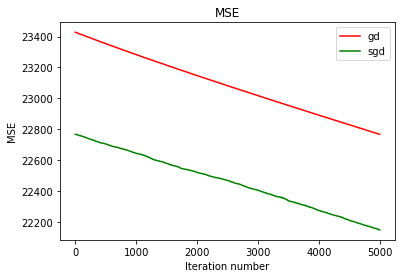

In [181]:
# Визуализация
plt.plot(range(len(errors)), errors, color ='r', label = 'gd')
plt.plot(range(len(errors_s)), errors_s, color ='g', label = 'sgd')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [171]:
w_list_arr = np.array(w_list)
w_list_s_arr = np.array(w_list_s)

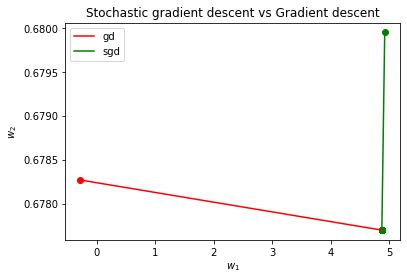

In [190]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
# plt.figure(figsize=(15, 12))


plt.title('Stochastic gradient descent vs Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_arr[:, 0], w_list_arr[:, 1], color='r')
plt.plot(w_list_arr[:, 0], w_list_arr[:, 1], color='r', label='gd')

plt.scatter(w_list_s_arr[:, 0], w_list_s_arr[:, 1], color = 'g')
plt.plot(w_list_s_arr[:, 0], w_list_s_arr[:, 1], color='g', label='sgd')

# plt.scatter(coef[0], coef[1], c='b')
plt.legend()
plt.show()
